# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Dataset

In [2]:
df=pd.read_csv(r"ENB2012_data.csv")

# Display Dataset

In [3]:
df.head()

,Relative Compactness\t,Surface Area\t,Wall Area\t,Roof Area\t,Overall Height\t,Orientation\t,Glazing Area\t,Glazing Area Distribution\t,Heating Load\t,Cooling Load\t
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Info of the Dataset

In [4]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Relative Compactness	       768 non-null    float64
 1   Surface Area	               768 non-null    float64
 2   Wall Area	                  768 non-null    float64
 3   Roof Area	                  768 non-null    float64
 4   Overall Height	             768 non-null    float64
 5   Orientation	                768 non-null    int64  
 6   Glazing Area	               768 non-null    float64
 7   Glazing Area Distribution	  768 non-null    int64  
 8   Heating Load	               768 non-null    float64
 9   Cooling Load	               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.columns.tolist()

['Relative Compactness\t',
 'Surface Area\t',
 'Wall Area\t',
 'Roof Area\t',
 'Overall Height\t',
 'Orientation\t',
 'Glazing Area\t',
 'Glazing Area Distribution\t',
 'Heating Load\t',
 'Cooling Load\t']

# Clean Column Names

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [8]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
try:
    df.drop("Cooling Load", axis=1, inplace=True)
    print(df.columns)
except:
    print(df.columns)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load'],
      dtype='object')


# Dataset Summary

## Shape and column names


In [10]:
print("Columns:",len( df.columns.tolist()))


Columns: 9


In [11]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())


Dataset shape: (768, 9)
Columns: ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load']



## Summary statistics

In [12]:
print(df.describe().T)

                           count        mean        std     min       25%  \
Relative Compactness       768.0    0.764167   0.105777    0.62    0.6825   
Surface Area               768.0  671.708333  88.086116  514.50  606.3750   
Wall Area                  768.0  318.500000  43.626481  245.00  294.0000   
Roof Area                  768.0  176.604167  45.165950  110.25  140.8750   
Overall Height             768.0    5.250000   1.751140    3.50    3.5000   
Orientation                768.0    3.500000   1.118763    2.00    2.7500   
Glazing Area               768.0    0.234375   0.133221    0.00    0.1000   
Glazing Area Distribution  768.0    2.812500   1.550960    0.00    1.7500   
Heating Load               768.0   22.307201  10.090196    6.01   12.9925   

                              50%       75%     max  
Relative Compactness         0.75    0.8300    0.98  
Surface Area               673.75  741.1250  808.50  
Wall Area                  318.50  343.0000  416.50  
Roof Area    

## Check for missing values

In [13]:
print(df.isnull().sum())

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
dtype: int64


# Univariate and  Bivariate: distributions of each numeric variable


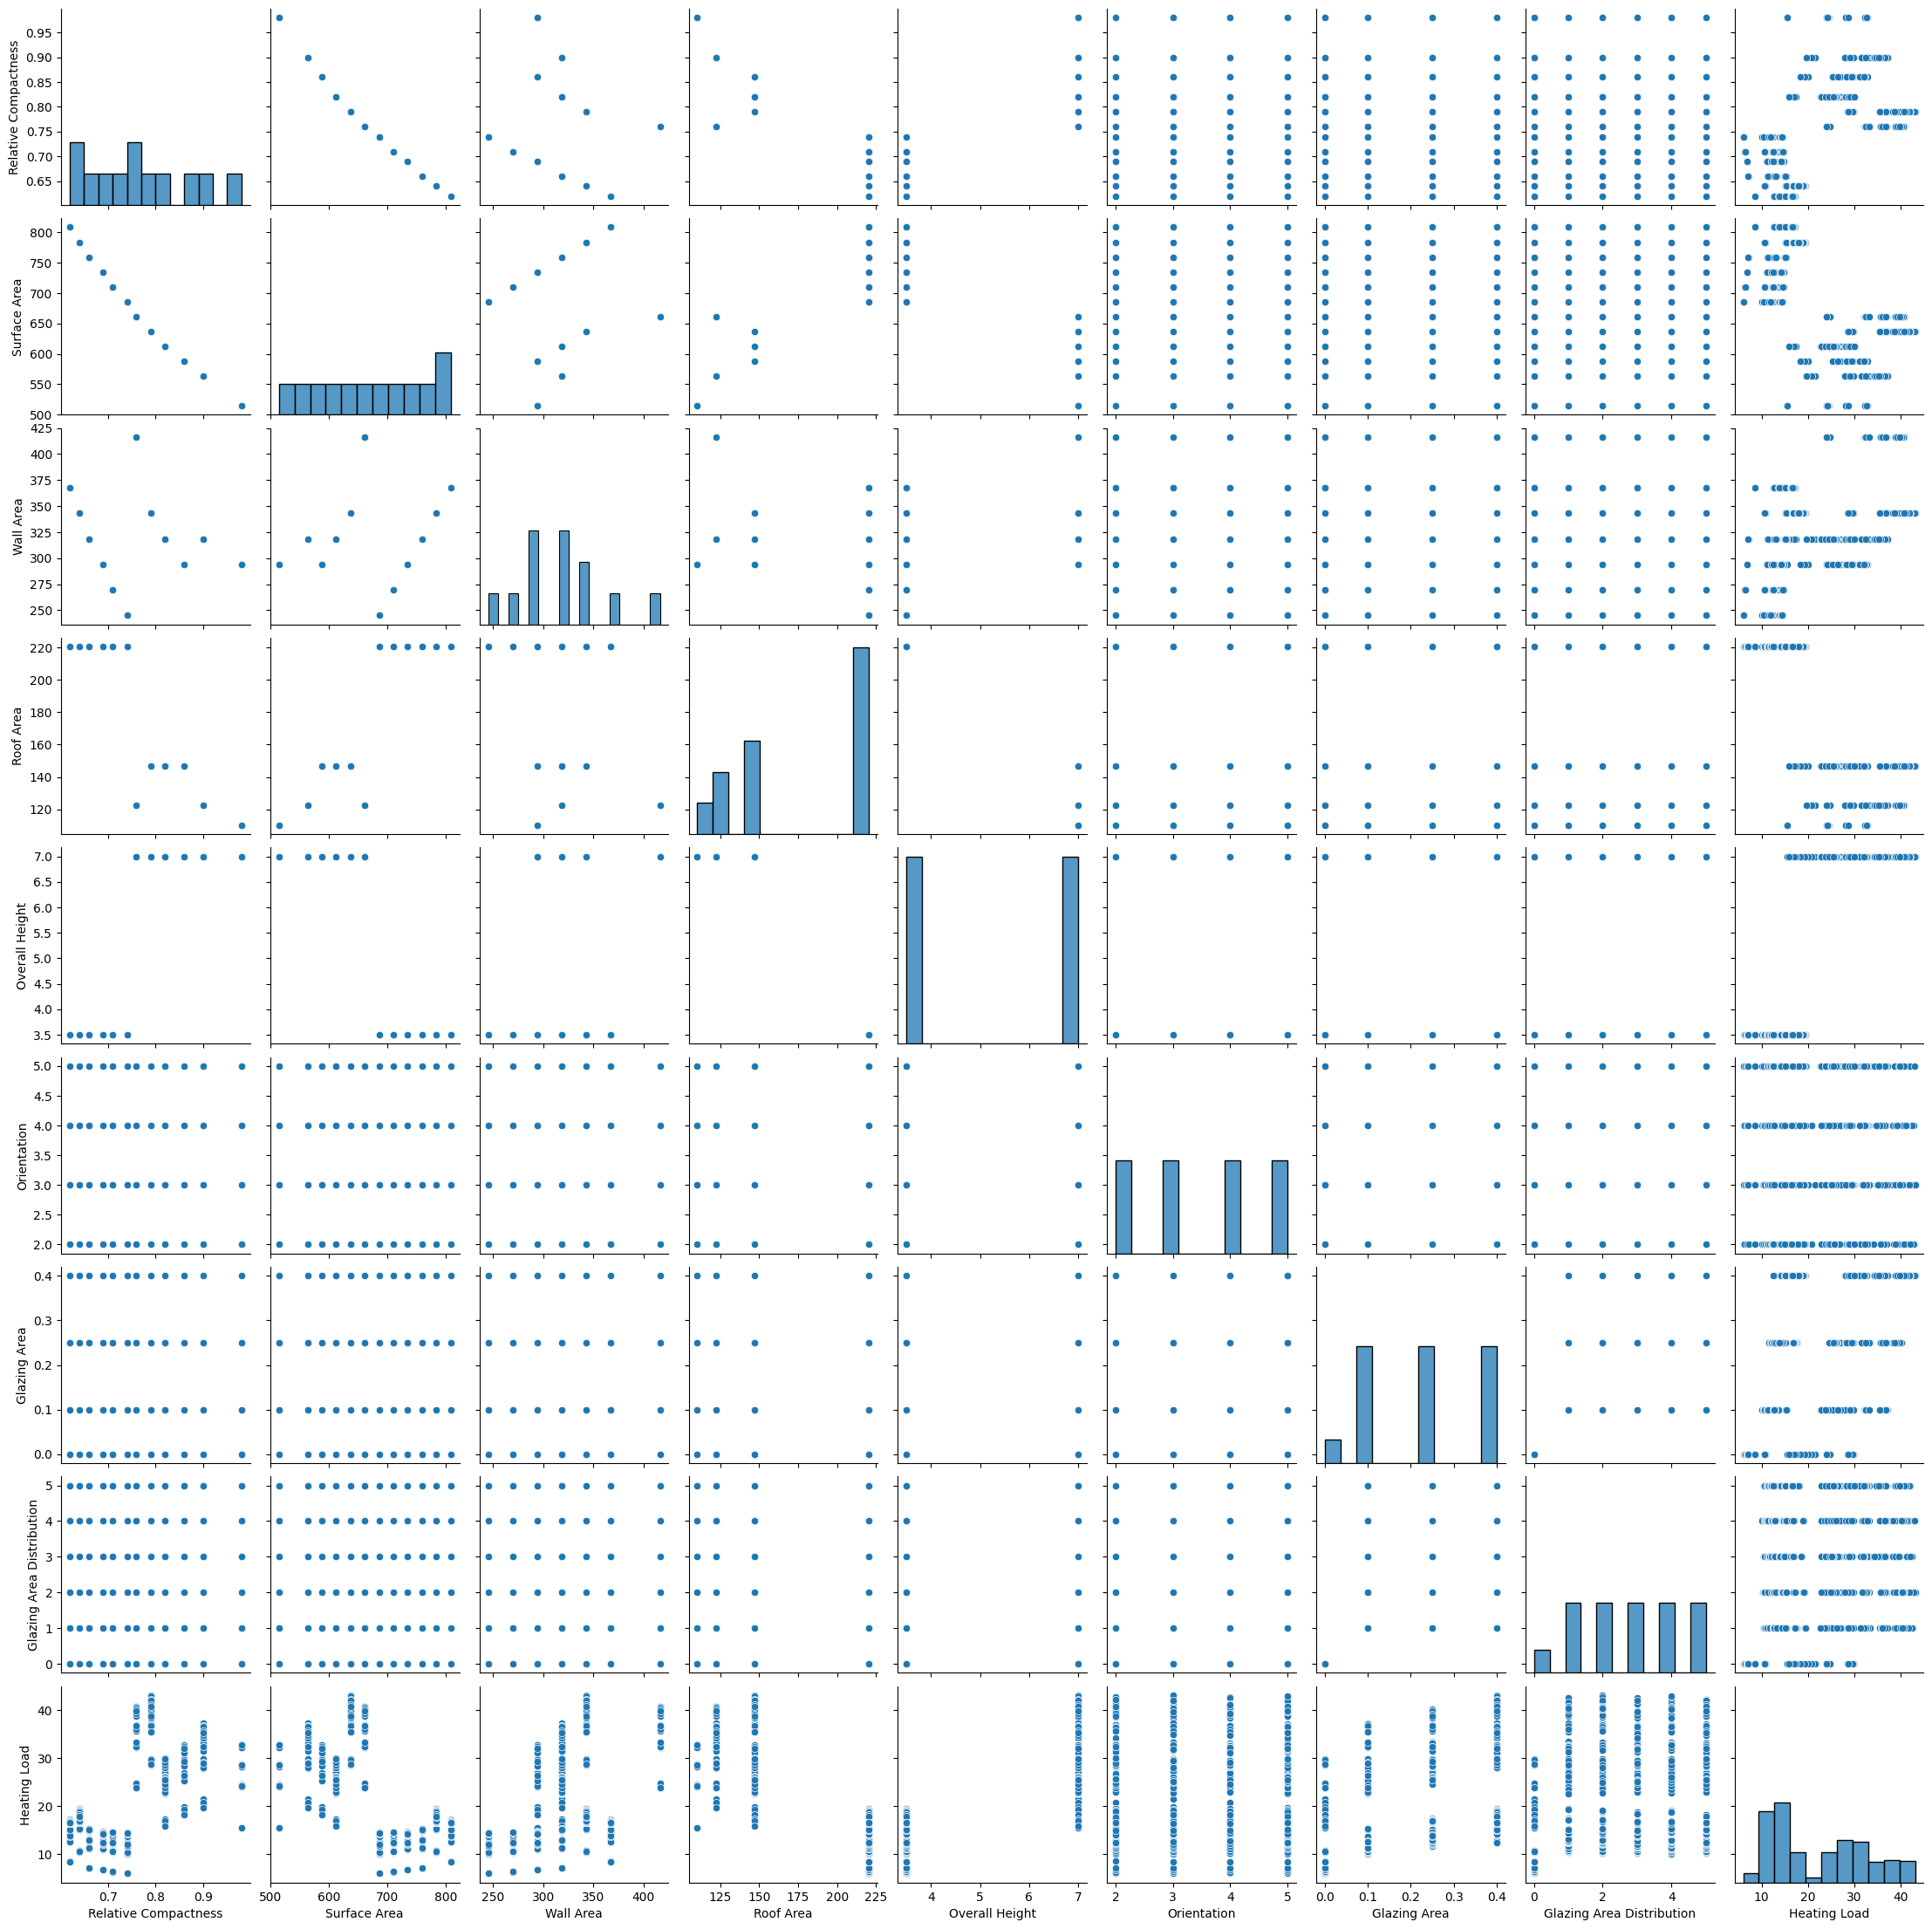

In [14]:
sns.pairplot(df)

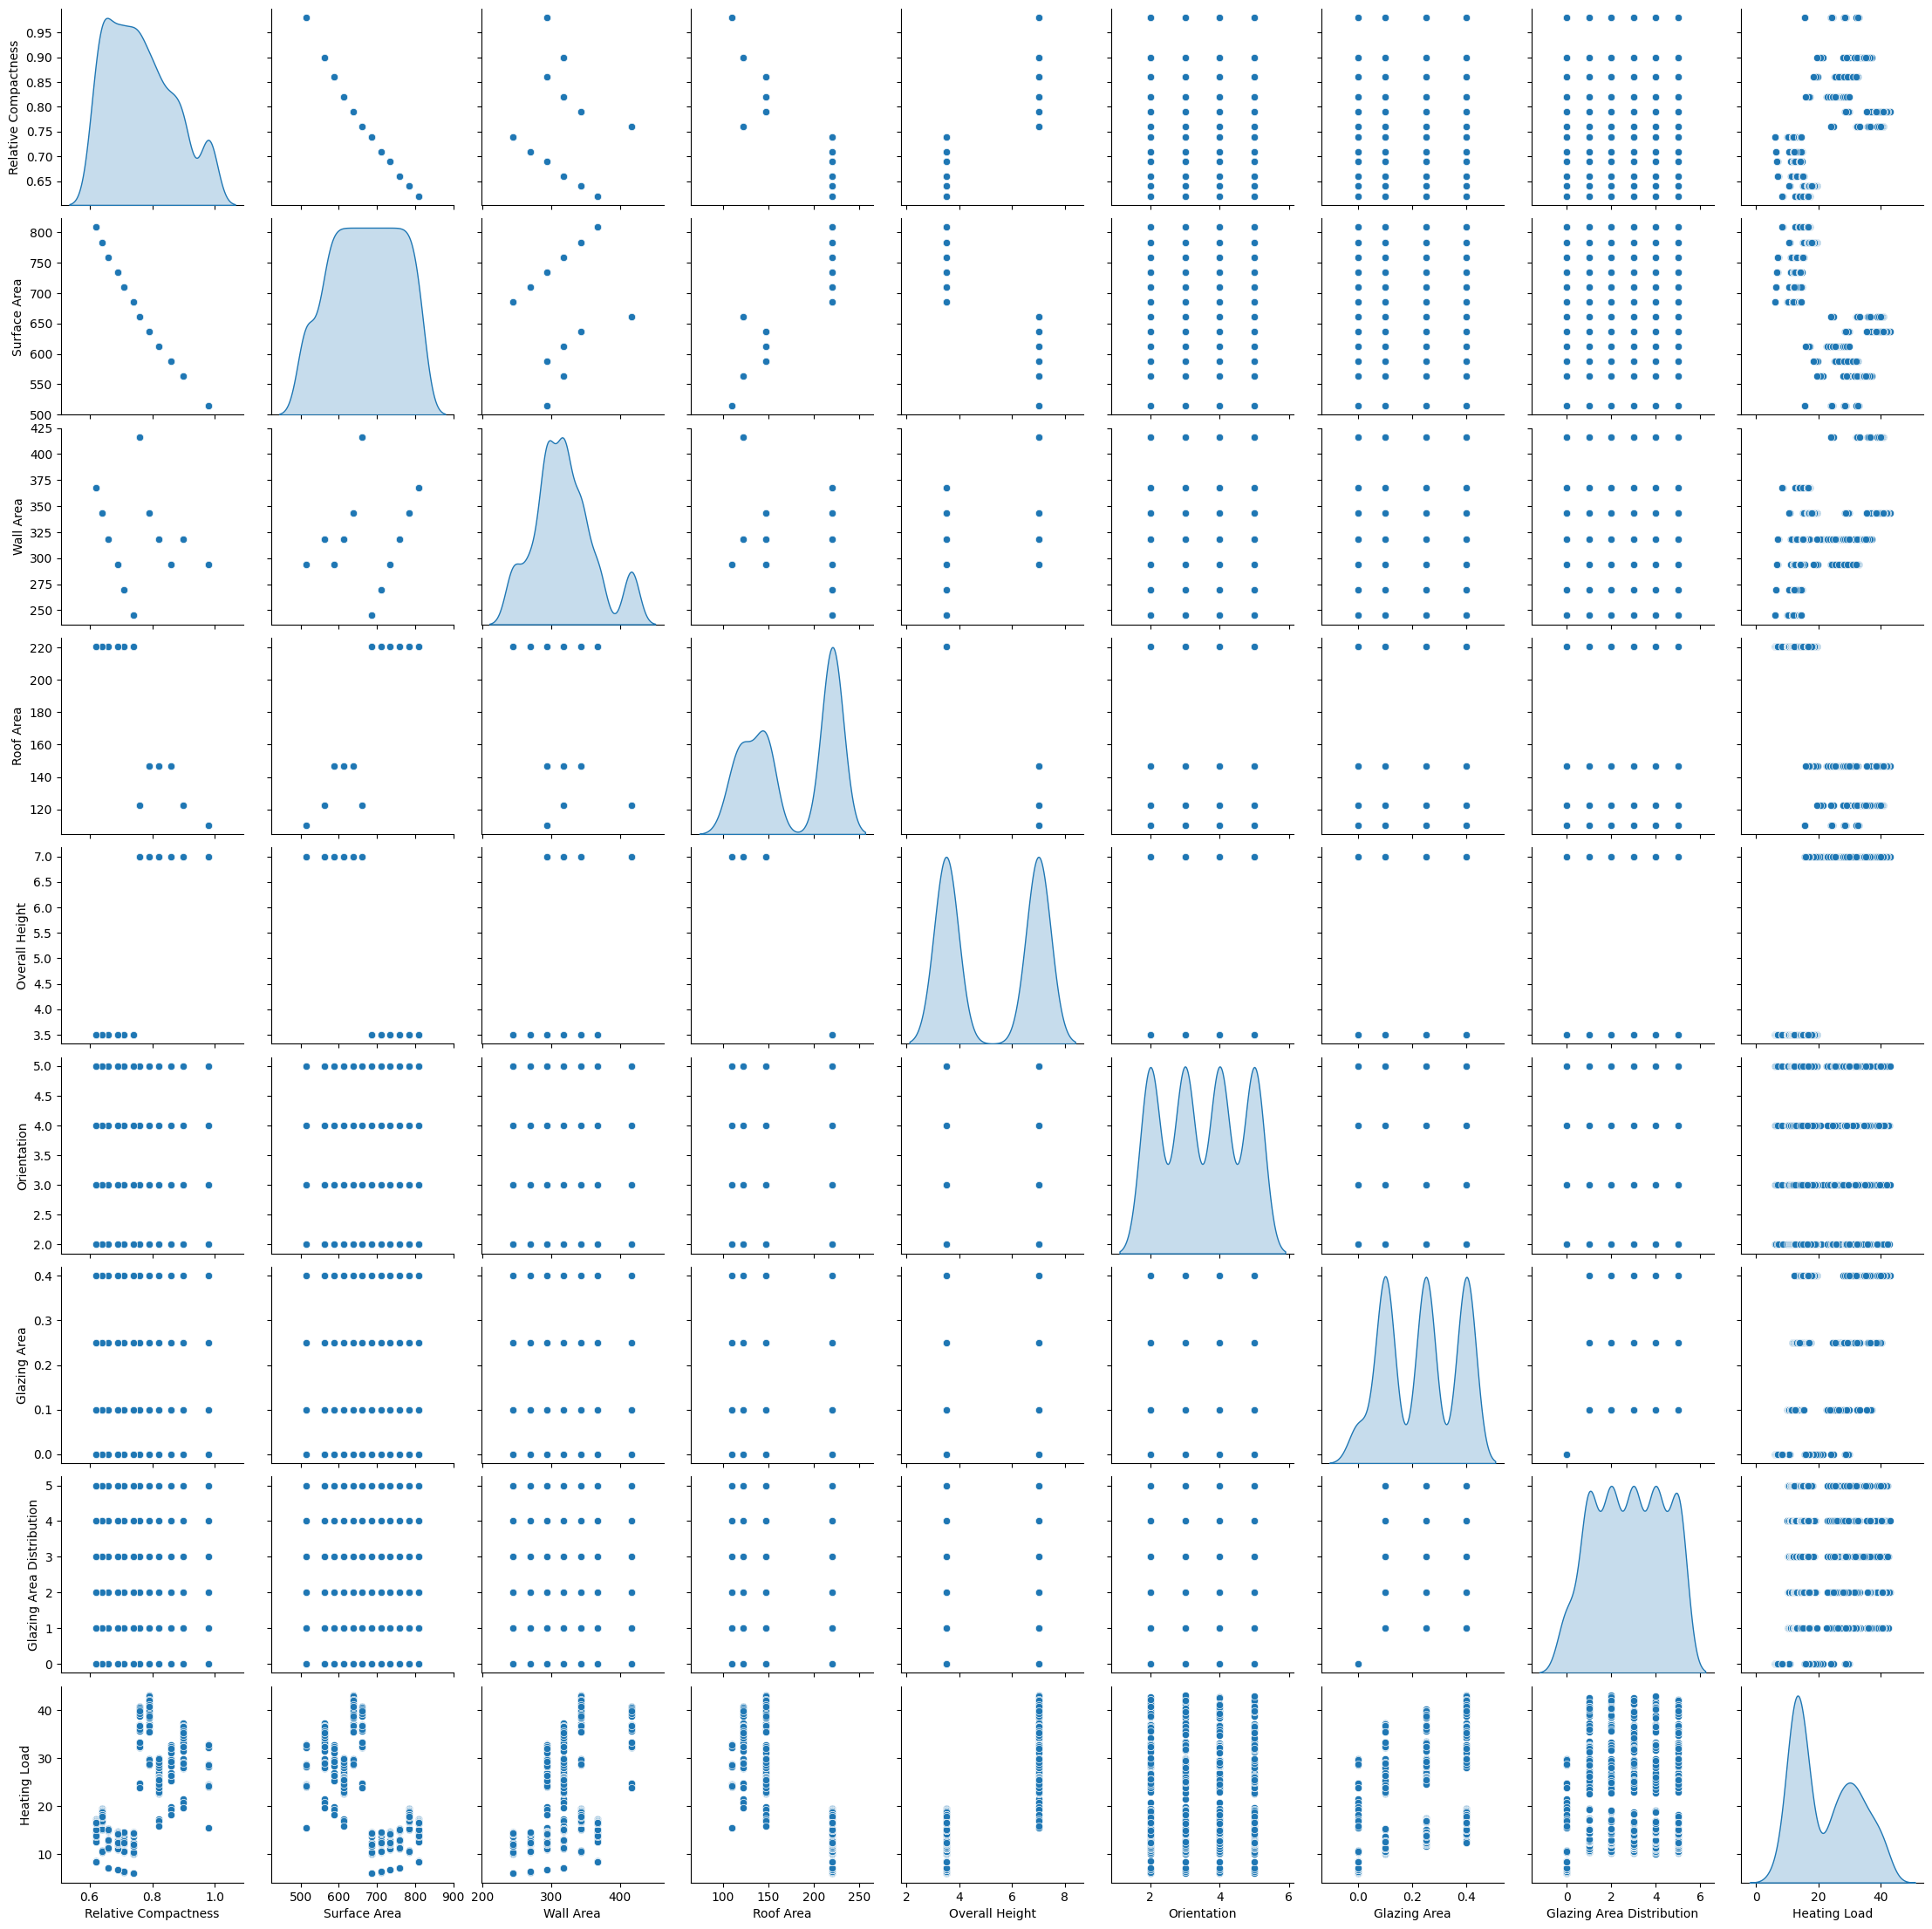

In [15]:
sns.pairplot(df,diag_kind='kde')


# Correlation Heatmap


In [16]:
df.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000


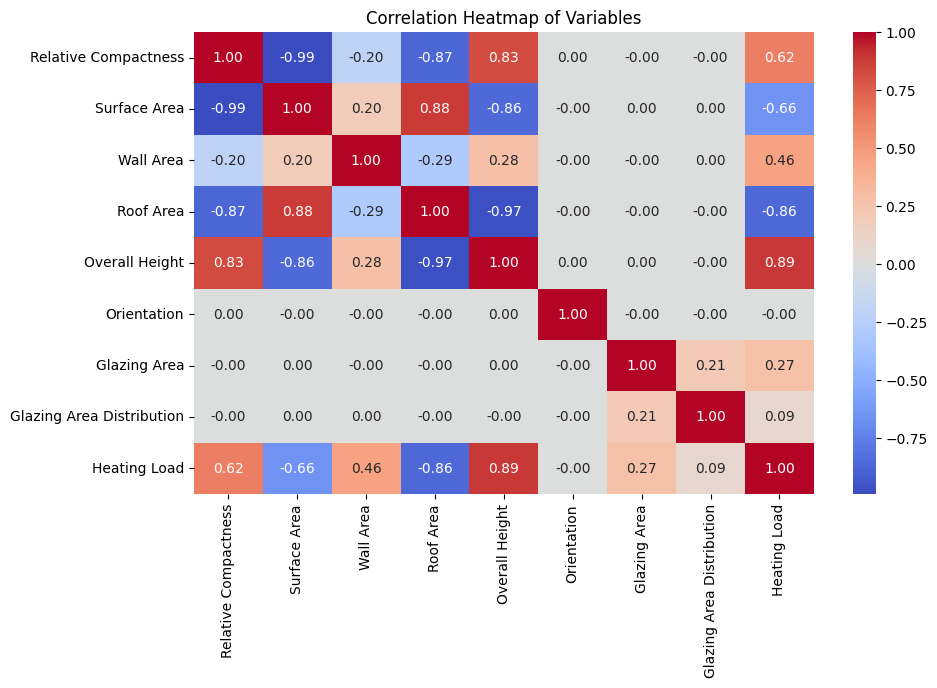

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Variables")
plt.show()


# Standard Deviation (to check spread of each variable)


In [18]:
print("Standard deviation of each feature:")
print(df.std().sort_values(ascending=False))

Standard deviation of each feature:
Surface Area                 88.086116
Roof Area                    45.165950
Wall Area                    43.626481
Heating Load                 10.090196
Overall Height                1.751140
Glazing Area Distribution     1.550960
Orientation                   1.118763
Glazing Area                  0.133221
Relative Compactness          0.105777
dtype: float64


# Printing Unique Values Count for Each Feature

In [19]:
for indx in df.columns.tolist():
    print(f"Column {indx} count:",len(df[indx].unique()))

Column Relative Compactness count: 12
Column Surface Area count: 12
Column Wall Area count: 7
Column Roof Area count: 4
Column Overall Height count: 2
Column Orientation count: 4
Column Glazing Area count: 4
Column Glazing Area Distribution count: 6
Column Heating Load count: 586


# Data Preprocessing and Training

# KFOLD


## ---- 1. Data ----

In [20]:
X = df.drop("Heating Load", axis=1)
y = df["Heating Load"]

numerical_features = [
    'Relative Compactness', 'Surface Area', 'Wall Area',
    'Roof Area', 'Overall Height', 'Glazing Area'
]
categorical_features = ['Orientation', 'Glazing Area Distribution']

## ---- 2. Preprocessor ----

In [21]:
preprocessor = ColumnTransformer([
    ('num_scale', StandardScaler(), numerical_features),
    ('cat_ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


## ---- 3. K-Fold Setup ----


In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## ---- 4. Model Configurations ----

In [23]:
degrees = [1, 2, 3]  # you can adjust this range to test model complexity

models = {
    "Ridge": Ridge(alpha=1.0, random_state=42, max_iter=100000),
    "Lasso": Lasso(alpha=0.01, random_state=42, max_iter=100000),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42, max_iter=100000)
}

## ---- 5. Run Cross-Validation for Each Model and Polynomial Degree ----

In [24]:
results = []

for degree in degrees:
    for name, model in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            (name.lower(), model)
        ])

        scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
        mean_score = scores.mean()
        std_score = scores.std()

        results.append({
            'Model': name,
            'Polynomial Degree': degree,
            'Mean R²': mean_score,
            'Std R²': std_score
        })

        print(f"{name} (Degree={degree}) → Mean R²: {mean_score:.4f} ± {std_score:.4f}")

Ridge (Degree=1) → Mean R²: 0.9200 ± 0.0025
Lasso (Degree=1) → Mean R²: 0.9202 ± 0.0028
ElasticNet (Degree=1) → Mean R²: 0.9193 ± 0.0027
Ridge (Degree=2) → Mean R²: 0.9506 ± 0.0021
Lasso (Degree=2) → Mean R²: 0.9568 ± 0.0022
ElasticNet (Degree=2) → Mean R²: 0.9440 ± 0.0019
Ridge (Degree=3) → Mean R²: 0.9849 ± 0.0014
Lasso (Degree=3) → Mean R²: 0.9908 ± 0.0001
ElasticNet (Degree=3) → Mean R²: 0.9680 ± 0.0017


## ---- 6. Display Results ----


In [25]:
results_df = pd.DataFrame(results)
print("\nCross-Validation Results:")
results_df


Cross-Validation Results:


,Model,Polynomial Degree,Mean R²,Std R²
0,Ridge,1,0.919969,0.002456
1,Lasso,1,0.920199,0.002799
2,ElasticNet,1,0.919319,0.002672
3,Ridge,2,0.950584,0.002072
4,Lasso,2,0.956775,0.002175
5,ElasticNet,2,0.943971,0.001899
6,Ridge,3,0.984906,0.001352
7,Lasso,3,0.990825,0.000144
8,ElasticNet,3,0.968008,0.001714


## ---- 7. Plot Model Performance vs Polynomial Degree ----

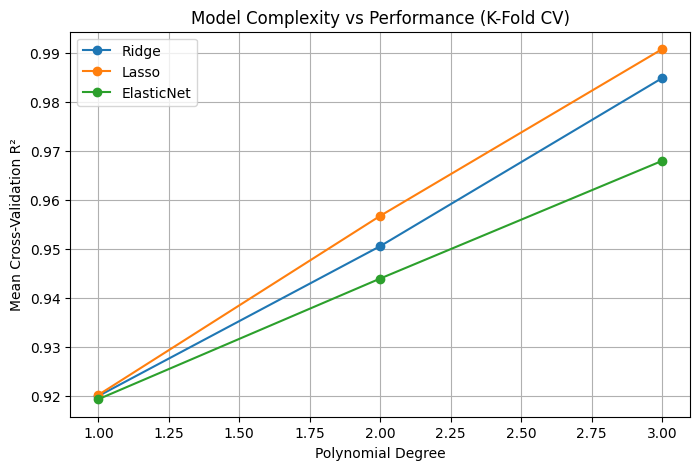

In [26]:
plt.figure(figsize=(8, 5))
for model_name in models.keys():
    subset = results_df[results_df["Model"] == model_name]
    plt.plot(subset["Polynomial Degree"], subset["Mean R²"], marker='o', label=model_name)

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Cross-Validation R²")
plt.title("Model Complexity vs Performance (K-Fold CV)")
plt.legend()
plt.grid(True)
plt.show()


# Plot the predicted vs actual values for the best model


Ridge (Degree=3)
R²: 0.9825 | MAE: 0.9383 | RMSE: 1.3343


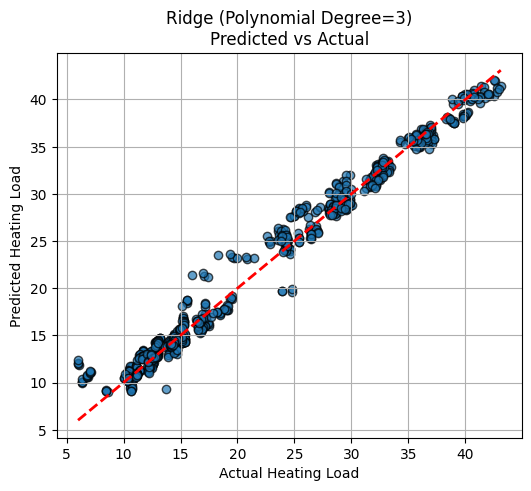


Lasso (Degree=3)
R²: 0.9761 | MAE: 1.0092 | RMSE: 1.5588


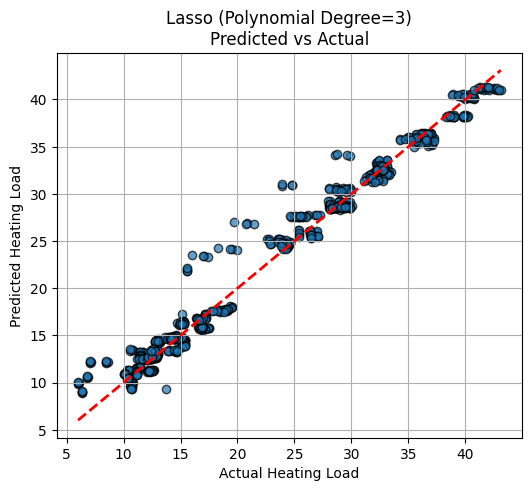


ElasticNet (Degree=3)
R²: 0.9696 | MAE: 1.2667 | RMSE: 1.7577


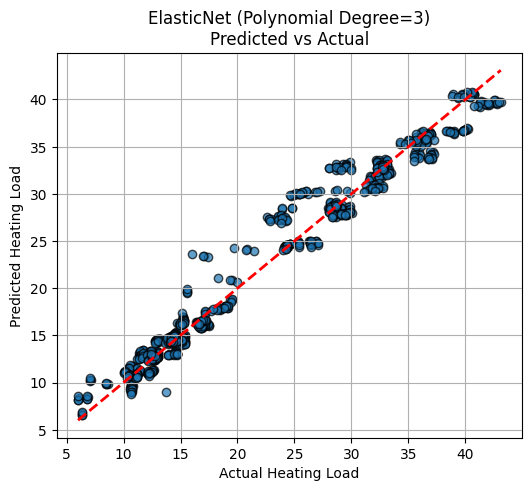

In [27]:
best_degree = 3

for name, model in models.items():
    # Build pipeline for each model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
        (name.lower(), model)
    ])
    
    # Get cross-validated predictions
    y_pred = cross_val_predict(pipeline, X, y, cv=5)
    
    # --- Metrics ---
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    print(f"\n{name} (Degree={best_degree})")
    print(f"R²: {r2:.4f} | MAE: {mae:.4f} | RMSE: {rmse:.4f}")
    
    # --- Plot Predicted vs Actual ---
    plt.figure(figsize=(6, 5))
    plt.scatter(y, y_pred, alpha=0.7, edgecolor='k')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel("Actual Heating Load")
    plt.ylabel("Predicted Heating Load")
    plt.title(f"{name} (Polynomial Degree={best_degree})\nPredicted vs Actual")
    plt.grid(True)
    plt.show()


# Test on desired model and degree

In [28]:
# 🧩 Choose the best model & degree manually after looking at results
best_model_name = "Lasso"   # for example
best_degree = 3             # for example

# Recreate that best pipeline
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
    (best_model_name.lower(), models[best_model_name])
])

# Fit it on the whole dataset (since now we know it's the best one)
best_pipeline.fit(X, y)


sample_test_data=df.iloc[0].tolist()
# ---- Prediction Part ----
custom_input = {
    'Relative Compactness': sample_test_data[0],
    'Surface Area': sample_test_data[1],
    'Wall Area': sample_test_data[2],
    'Roof Area': sample_test_data[3],
    'Overall Height': sample_test_data[4],
    'Orientation': sample_test_data[5],
    'Glazing Area': sample_test_data[6],
    'Glazing Area Distribution': sample_test_data[7]
} 

custom_df = pd.DataFrame([custom_input])

# Make prediction
predicted_load = best_pipeline.predict(custom_df)[0]
print(f"Predicted Heating Load: {predicted_load:.2f}")


Predicted Heating Load: 15.76


# Save All Trained Models

Using `joblib` to persist all trained models for later use (deployment, API, comparison, etc.)

In [29]:
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Define models again for saving
models_to_save = {
    "Ridge": Ridge(alpha=1.0, random_state=42, max_iter=100000),
    "Lasso": Lasso(alpha=0.01, random_state=42, max_iter=100000),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42, max_iter=100000)
}

degrees = [1, 2, 3]
saved_models = []

# Train and save all models
for degree in degrees:
    for name, model in models_to_save.items():
        # Build pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            (name.lower(), model)
        ])
        
        # Train on full dataset
        pipeline.fit(X, y)
        
        # Generate filename
        filename = f"models/{name.lower()}_degree{degree}.joblib"
        
        # Save the model
        joblib.dump(pipeline, filename)
        
        # Get R² score for metadata
        y_pred = pipeline.predict(X)
        r2 = r2_score(y, y_pred)
        
        saved_models.append({
            'model_name': name,
            'degree': degree,
            'filename': filename,
            'r2_score': round(r2, 4)
        })
        
        print(f"✓ Saved {name} (Degree {degree}) → R²: {r2:.4f}")

# Save metadata for all models
metadata = {
    'models': saved_models,
    'best_model': 'lasso_degree3.joblib',
    'features': X.columns.tolist(),
    'numerical_features': numerical_features,
    'categorical_features': categorical_features
}
joblib.dump(metadata, 'models/all_models_metadata.joblib')

print(f"\n✓ All {len(saved_models)} models saved to models/ directory")
print("✓ Metadata saved to models/all_models_metadata.joblib")

✓ Saved Ridge (Degree 1) → R²: 0.9240
✓ Saved Lasso (Degree 1) → R²: 0.9237
✓ Saved ElasticNet (Degree 1) → R²: 0.9230
✓ Saved Ridge (Degree 2) → R²: 0.9620
✓ Saved Lasso (Degree 2) → R²: 0.9608
✓ Saved ElasticNet (Degree 2) → R²: 0.9517
✓ Saved Ridge (Degree 3) → R²: 0.9931
✓ Saved Lasso (Degree 3) → R²: 0.9921
✓ Saved ElasticNet (Degree 3) → R²: 0.9753

✓ All 9 models saved to models/ directory
✓ Metadata saved to models/all_models_metadata.joblib


# Load and Use Saved Models

Demonstrating how to list all available models and load any specific one

In [30]:
# Load metadata to see all available models
loaded_metadata = joblib.load('models/all_models_metadata.joblib')

print("Available Models:")
print("-" * 50)
models_df = pd.DataFrame(loaded_metadata['models'])
print(models_df.to_string(index=False))

print(f"\nBest Model: {loaded_metadata['best_model']}")

Available Models:
--------------------------------------------------
model_name  degree                         filename  r2_score
     Ridge       1      models/ridge_degree1.joblib    0.9240
     Lasso       1      models/lasso_degree1.joblib    0.9237
ElasticNet       1 models/elasticnet_degree1.joblib    0.9230
     Ridge       2      models/ridge_degree2.joblib    0.9620
     Lasso       2      models/lasso_degree2.joblib    0.9608
ElasticNet       2 models/elasticnet_degree2.joblib    0.9517
     Ridge       3      models/ridge_degree3.joblib    0.9931
     Lasso       3      models/lasso_degree3.joblib    0.9921
ElasticNet       3 models/elasticnet_degree3.joblib    0.9753

Best Model: lasso_degree3.joblib


In [31]:
# Load a specific model (best model: Lasso Degree 3)
best_model = joblib.load('models/lasso_degree3.joblib')

# Test prediction with loaded model
test_building = pd.DataFrame([{
    'Relative Compactness': 0.82,
    'Surface Area': 612.5,
    'Wall Area': 318.5,
    'Roof Area': 147.0,
    'Overall Height': 7.0,
    'Orientation': 3,
    'Glazing Area': 0.25,
    'Glazing Area Distribution': 2
}])

prediction = best_model.predict(test_building)[0]
print(f"Predicted Heating Load (Lasso Degree 3): {prediction:.2f} kWh/m²")

# Compare predictions across all models for the same input
print("\nComparison across all models:")
print("-" * 50)
for model_info in loaded_metadata['models']:
    model = joblib.load(model_info['filename'])
    pred = model.predict(test_building)[0]
    print(f"{model_info['model_name']:12} (Degree {model_info['degree']}): {pred:.2f} kWh/m²")

Predicted Heating Load (Lasso Degree 3): 27.60 kWh/m²

Comparison across all models:
--------------------------------------------------
Ridge        (Degree 1): 31.80 kWh/m²
Lasso        (Degree 1): 31.73 kWh/m²
ElasticNet   (Degree 1): 31.58 kWh/m²
Ridge        (Degree 2): 31.30 kWh/m²
Lasso        (Degree 2): 31.22 kWh/m²
ElasticNet   (Degree 2): 31.75 kWh/m²
Ridge        (Degree 3): 28.29 kWh/m²
Lasso        (Degree 3): 27.60 kWh/m²
ElasticNet   (Degree 3): 30.21 kWh/m²
